In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils  import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [2]:
# load mnist dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]

# resize and normalize
x_train = x_train.reshape(-1, image_size, image_size, 1)
x_test = x_test.reshape(-1, image_size, image_size, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

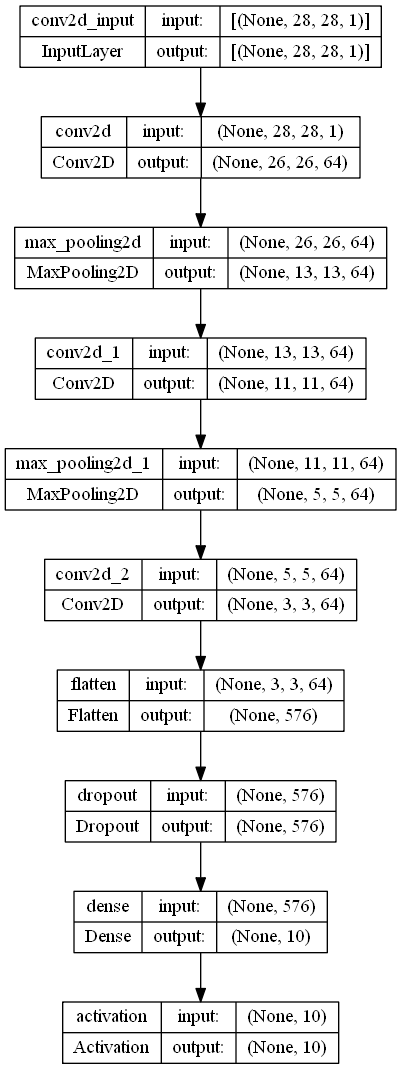

In [5]:
# model is a stack of CNN-ReLU-MaxPooling

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(Flatten())

# dropout added as regularizer
model.add(Dropout(dropout))

# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()
plot_model(model, to_file="../Image/cnn-mnist.png", show_shapes=True)

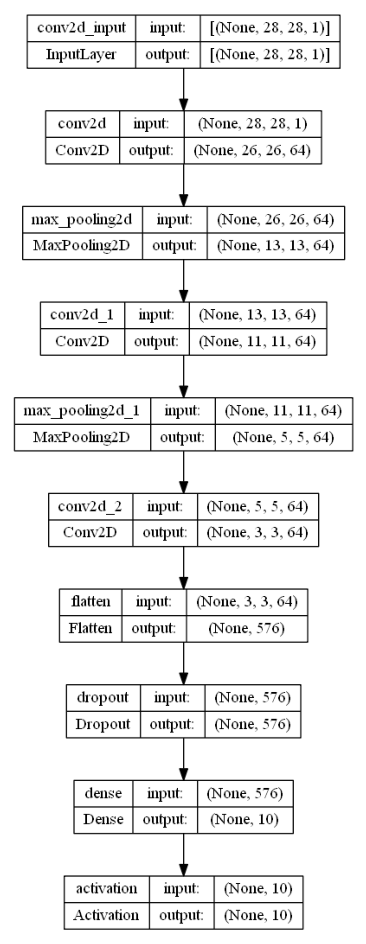

In [8]:
# Load cnn-mnist.png 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,12))
image = mpimg.imread("../Image/cnn-mnist.png", "png")
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10


: 

: 